### About the Dataset

This dataset contains information about the students' academic performance and their training and placement status. Below is a detailed description of each feature:

| Feature                | Description                                                                                      | Emoticon    |
|------------------------|--------------------------------------------------------------------------------------------------|-------------|
| **CGPA**               | Overall grades achieved by the student.                                                          | 🎓         |
| **Internships**        | Number of internships the student has participated in.                                           | 💼         |
| **Projects**           | Number of projects the student has completed.                                                    | 📚         |
| **Workshops/Certifications** | Online courses and certifications opted by students to enhance their skills.                    | 🎓📜        |
| **AptitudeTestScore**  | Score obtained in aptitude tests, which assess quantitative and logical thinking in recruitment. | 🧠         |
| **SoftSkillRating**    | Rating for communication skills, essential for placements and professional growth.              | 💬         |
| **ExtraCurricularActivities** | Reflects the student's engagement in activities outside of academics.                         | ⚽🎭        |



# **Exploratory Data Analysis of Placement Data**

Importation of Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer,LabelEncoder, OrdinalEncoder

In [2]:
data = pd.read_csv('placementdata.csv')
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


## Initial Exploration of Data

In [3]:
print(f'the total number of rows in the data are {data.shape[0]}')
print(f'the total number of columns in the data are {data.shape[1]}')

the total number of rows in the data are 10000
the total number of columns in the data are 12


In [4]:
data.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
CGPA,10000.0,7.69801,0.640131,6.5,7.40,7.7,8.20,9.1
Internships,10000.0,1.04920,0.665901,0.0,1.00,1.0,1.00,2.0
Projects,10000.0,2.02660,0.867968,0.0,1.00,2.0,3.00,3.0
Workshops/Certifications,10000.0,1.01320,0.904272,0.0,0.00,1.0,2.00,3.0
AptitudeTestScore,10000.0,79.44990,8.159997,60.0,73.00,80.0,87.00,90.0
SoftSkillsRating,10000.0,4.32396,0.411622,3.0,4.00,4.4,4.70,4.8
SSC_Marks,10000.0,69.15940,10.430459,55.0,59.00,70.0,78.00,90.0
HSC_Marks,10000.0,74.50150,8.919527,57.0,67.00,73.0,83.00,88.0


Inferences :

1) All Columns have equal number of values as present in no. of rows in data so it means there are no null values in the data

2) StudentID have all the unique values it must be remain index of the data .

3) Max Number of Internship done by any student is 3

4) SSC marks may have outliers

5) Average Aptitude test Marks of these students are 79.44

6) Average SSC Marks of these students are 69.15

7) Average HSC Marks of these students are 74.50

8) Max Number of Projects done by any student is 3

9) Highest CGPA attain by any student is 9.1

10) Max Number of Certifications done or Workshop attended by any student is 4




In [7]:
data.select_dtypes(object).describe().T

,count,unique,top,freq
ExtracurricularActivities,10000,2,Yes,5854
PlacementTraining,10000,2,Yes,7318
PlacementStatus,10000,2,NotPlaced,5803


Inferences :

1) All Columns have equal number of values as present in no. of rows in data so it means there are no null values in the data

2) ExtracurricularActivities have only Two Categories Yes or No .

3) PlacementTraining have only Two Categories Yes or No .

4) PlacementStatus have only Two Categories Placed or NotPlaced .

In [8]:
# StudentID is Unique column for the data as it contain all the unique values so we should make index of it

data.set_index('StudentID', inplace=True)
data.tail(2)

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,,,,,,,,,,,
9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed
10000,8.4,0,1,1,66,3.8,No,No,62,66,NotPlaced


## **Correlation Analysis**

<Axes: >

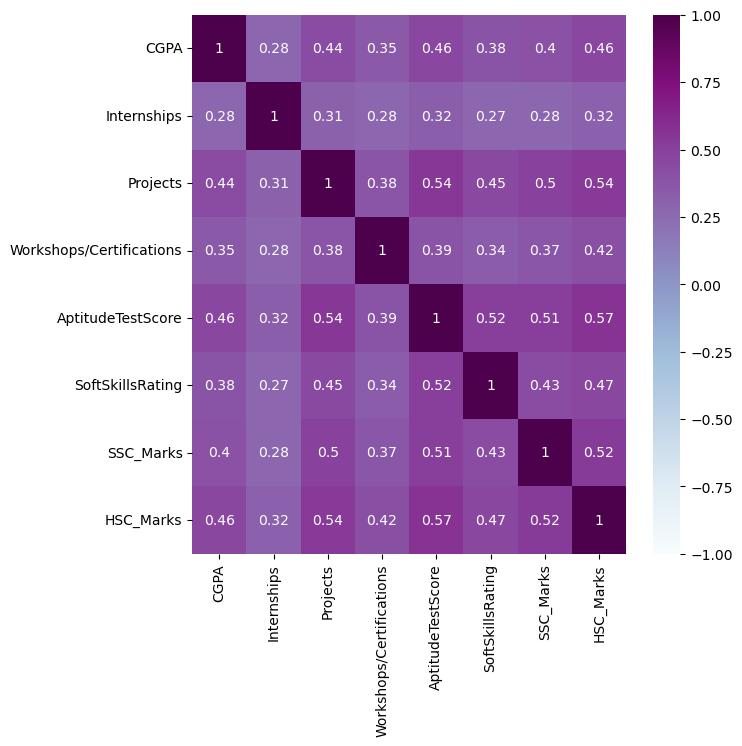

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(data = data.corr(numeric_only=True), vmax= 1, vmin= -1, annot= True, cmap= 'BuPu')

Inferences :

1) A clear connection exists between academic performance (SSC_Marks, HSC_Marks, CGPA) and Aptitude Test Scores.

2) Practical experience through Projects and Workshops/Certifications positively correlates with Aptitude Test Scores.

3) Soft Skills Rating shows moderate to strong positive correlations across various factors, highlighting its significance.

### Columns Categorization into Num_cols and cat_cols

In [10]:
num_cols = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

cat_cols = ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus', 'Internships',  'Projects', 'Workshops/Certifications']

## **Univariate Analysis**

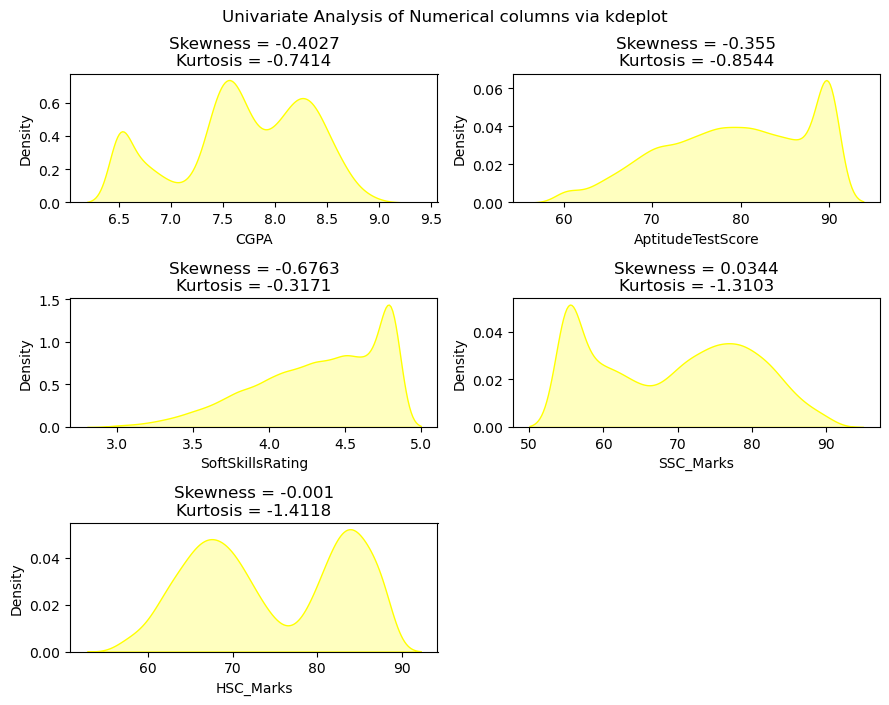

In [11]:
plt.figure(figsize=(9,9))
plt.suptitle('Univariate Analysis of Numerical columns via kdeplot')
t = 1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.kdeplot(data = data, x = i, fill= True, color = 'yellow')
    plt.title(f'''Skewness = {round(data[i].skew(), 4)}
Kurtosis = {round(data[i].kurt(), 4)}''')
    t = t + 1

plt.tight_layout()
plt.show()


Inferences

1) Most of the distributions are slightly negatively skewed, meaning they lean towards higher values.

2) SSC Marks and HSC Marks are nearly symmetric, indicating a balanced distribution.

3) All distributions are platykurtic, meaning they are flatter and more spread out rather than sharply peaked.

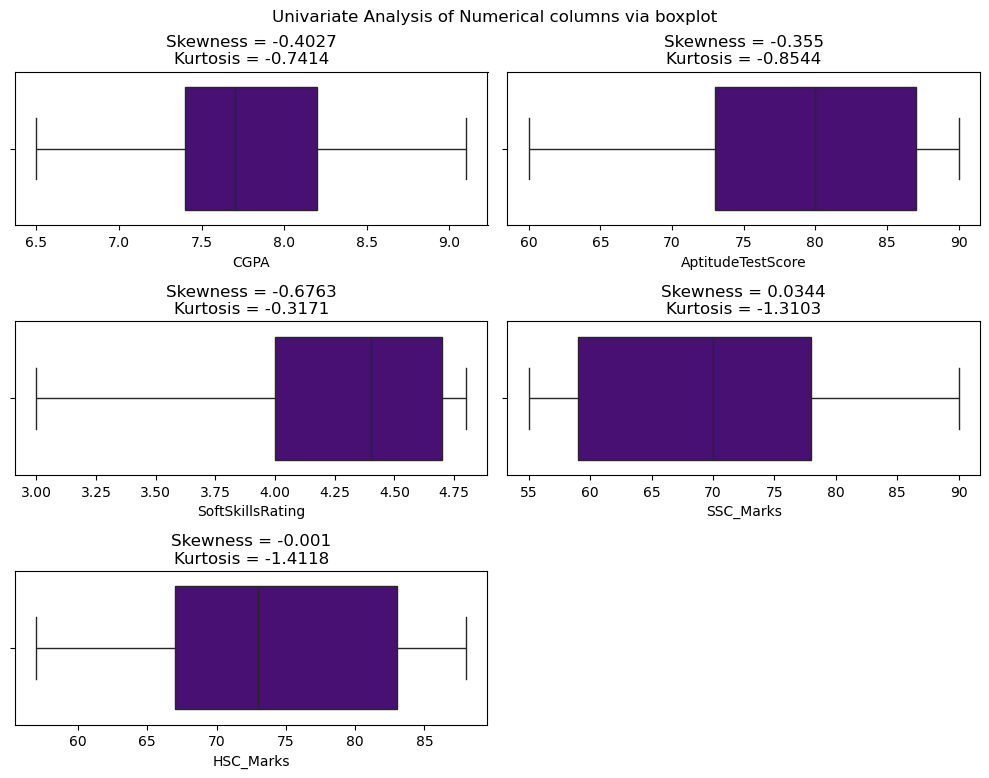

In [12]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical columns via boxplot')
t = 1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data = data, x = i, fill= True, color = 'indigo')
    plt.title(f'''Skewness = {round(data[i].skew(), 4)}
Kurtosis = {round(data[i].kurt(), 4)}''')
    t = t + 1

plt.tight_layout()
plt.show()


Inferences :

1) No Variable is having Outliers .

2) Mostly Students have 7.5 to 8.2 CGPA range.

3) Mostly HSC Marks are in range of 65 to 85.

4) Mostly SSC Marks are in range of 60 to 78

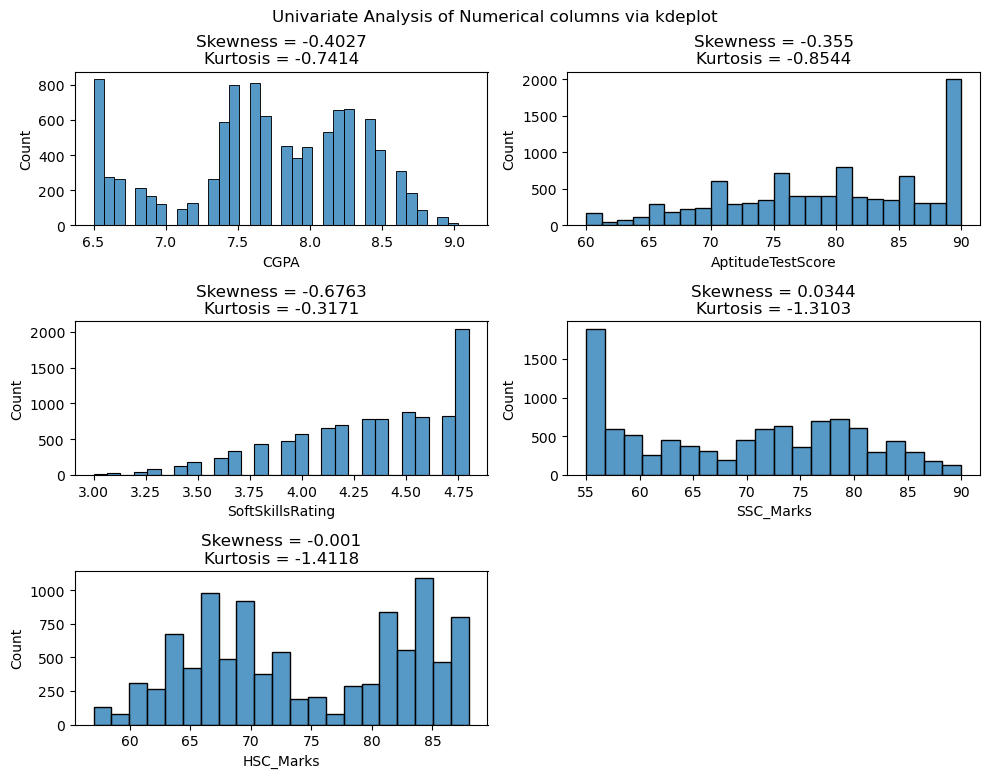

In [13]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical columns via kdeplot')
t = 1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.histplot(data = data, x = i, fill= True)
    plt.title(f'''Skewness = {round(data[i].skew(), 4)}
Kurtosis = {round(data[i].kurt(), 4)}''')
    t = t + 1

plt.tight_layout()
plt.show()


Inferences:

1) Mokstly Students have good Soft Skills Rating.

2) Many Students have Scored High Aptitude Marks.

3) More Student Score 80+ Marks in HSC as Compared to SSC.


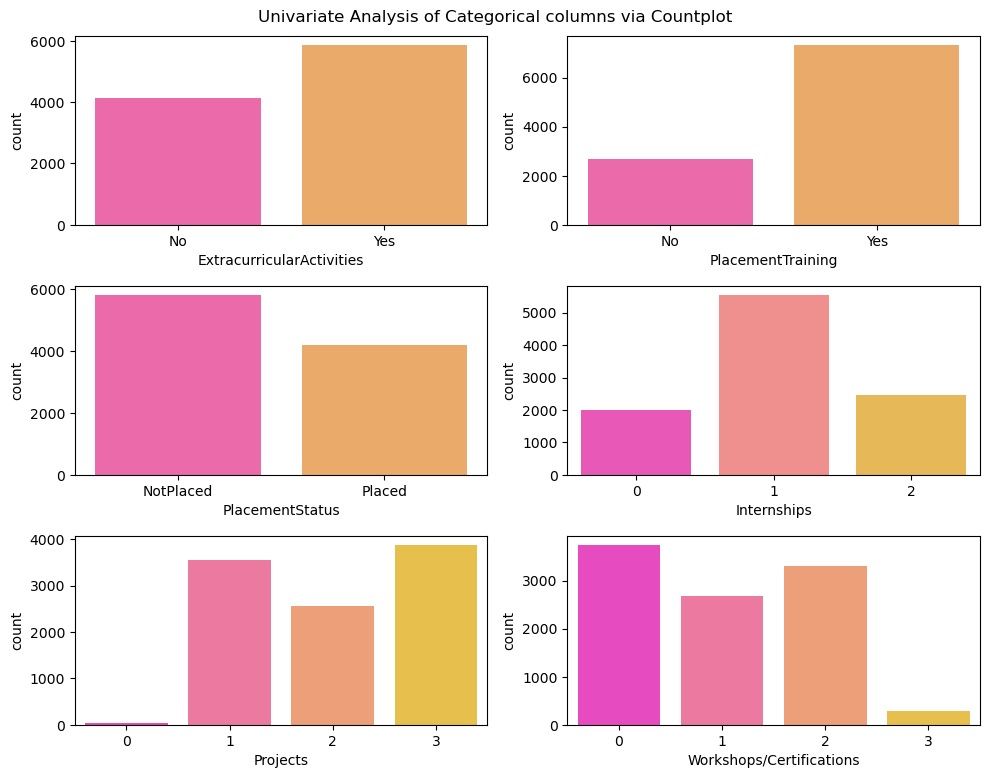

In [14]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Categorical columns via Countplot')
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data = data, x = i, palette='spring')
    
    t = t + 1

plt.tight_layout()
plt.show()

Inferences:

1) Majority Students are Involved in EXtracurricular Activities.

2) Many Student Recieve Placement Training.

3) Majority Population have done 1 Internship

4) Those who dont get Placement are slightly high in number.



## **Bivariate Analysis**

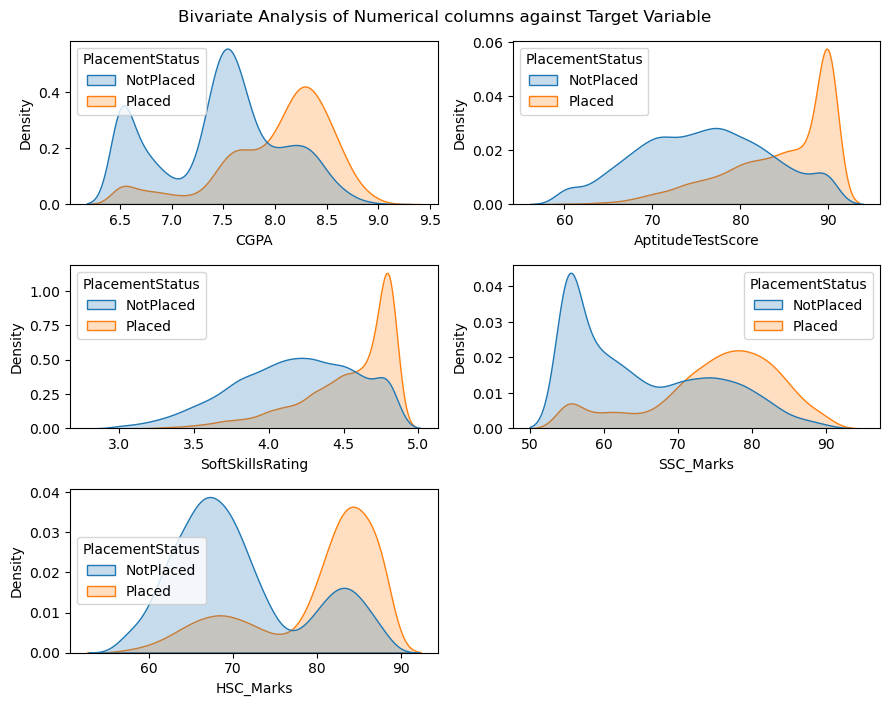

In [15]:
plt.figure(figsize=(9,9))
plt.suptitle('Bivariate Analysis of Numerical columns against Target Variable')
t = 1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.kdeplot(data = data, x = i, fill = True, hue = data['PlacementStatus'])
    
    t = t + 1

plt.tight_layout()
plt.show()

Inferences :

1) Higher CGPA, Aptitude Test Scores, and Soft Skills Ratings are generally associated with a higher likelihood of placement.

2) SSC_Marks and HSC_Marks appear to have a less pronounced impact on placement status.

3) Overlapping distributions indicate that these factors alone may not be sufficient to predict placement accurately.

4) While academic performance and aptitude are important, strong soft skills seem to play a significant role in achieving placement success.

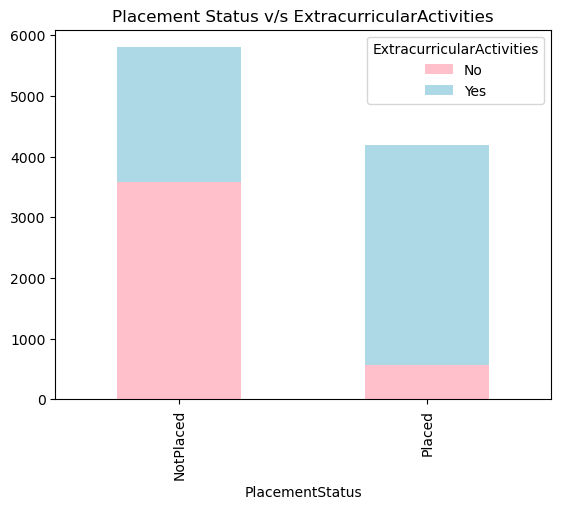

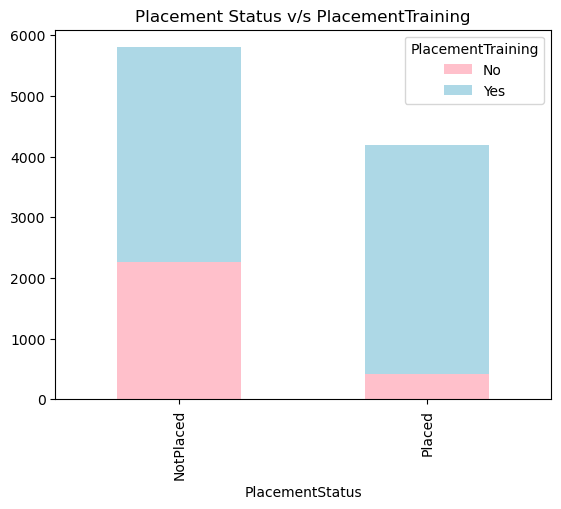

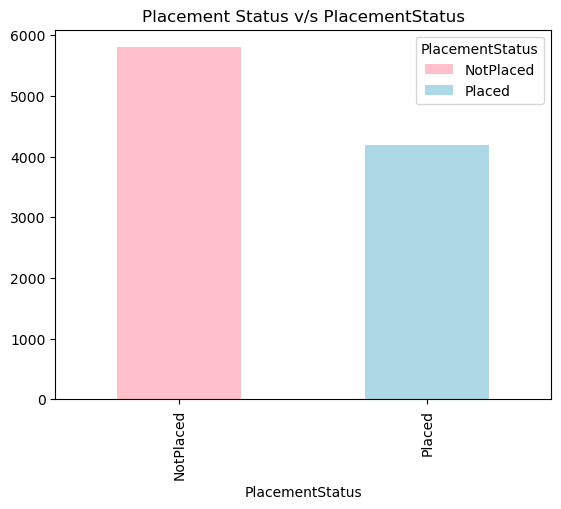

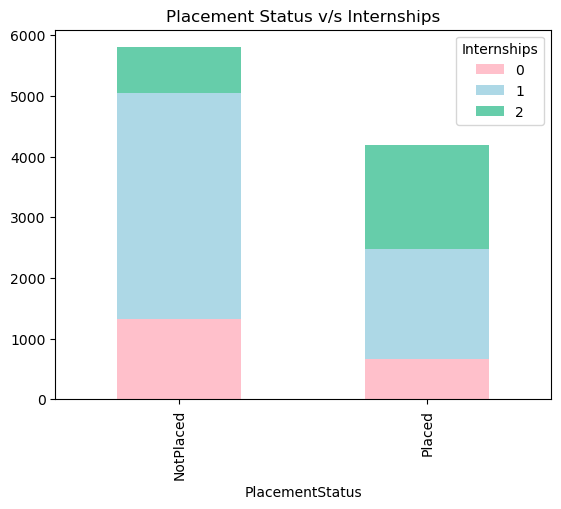

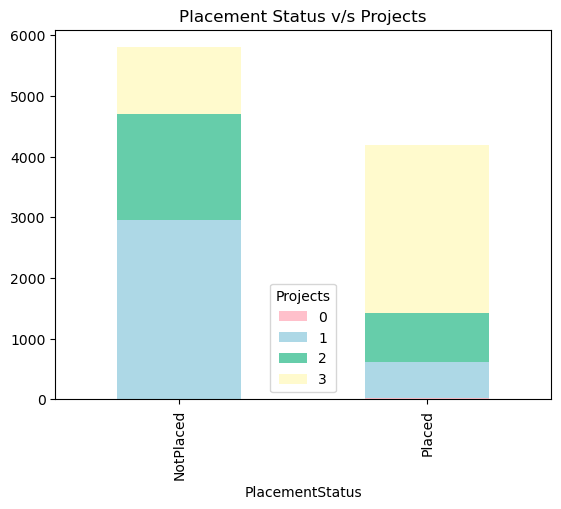

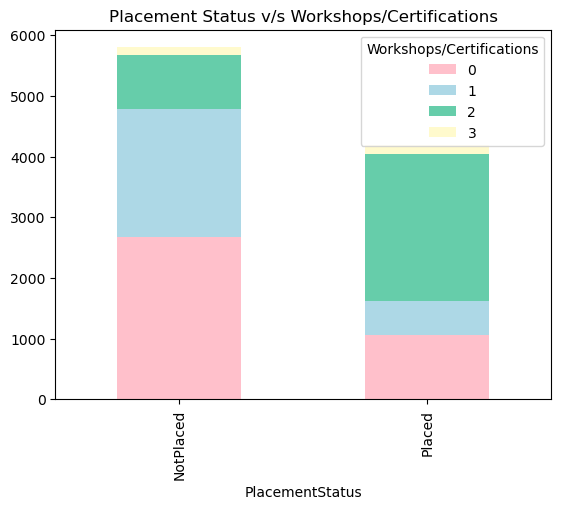

In [16]:
for i in cat_cols:
    cross_tab = pd.crosstab(data['PlacementStatus'], data[i])

    cross_tab.plot(kind = 'bar', stacked= True, color = ['pink','lightblue', 'mediumaquamarine', 'lemonchiffon'])

    plt.title(f'Placement Status v/s {i}')

    

Inferences :

1) Extracurricular Activities play a very significant role in Placement of Students.

2) Majority of the Placed Students have taken the Placement Training. so it play a crucial role.

3) Number of Internship increase the chances of placements.

4) More Number of project will give an extra edge in Placement.

5) Workshops and Certifications are also enhance placements.

## **Pairplot**

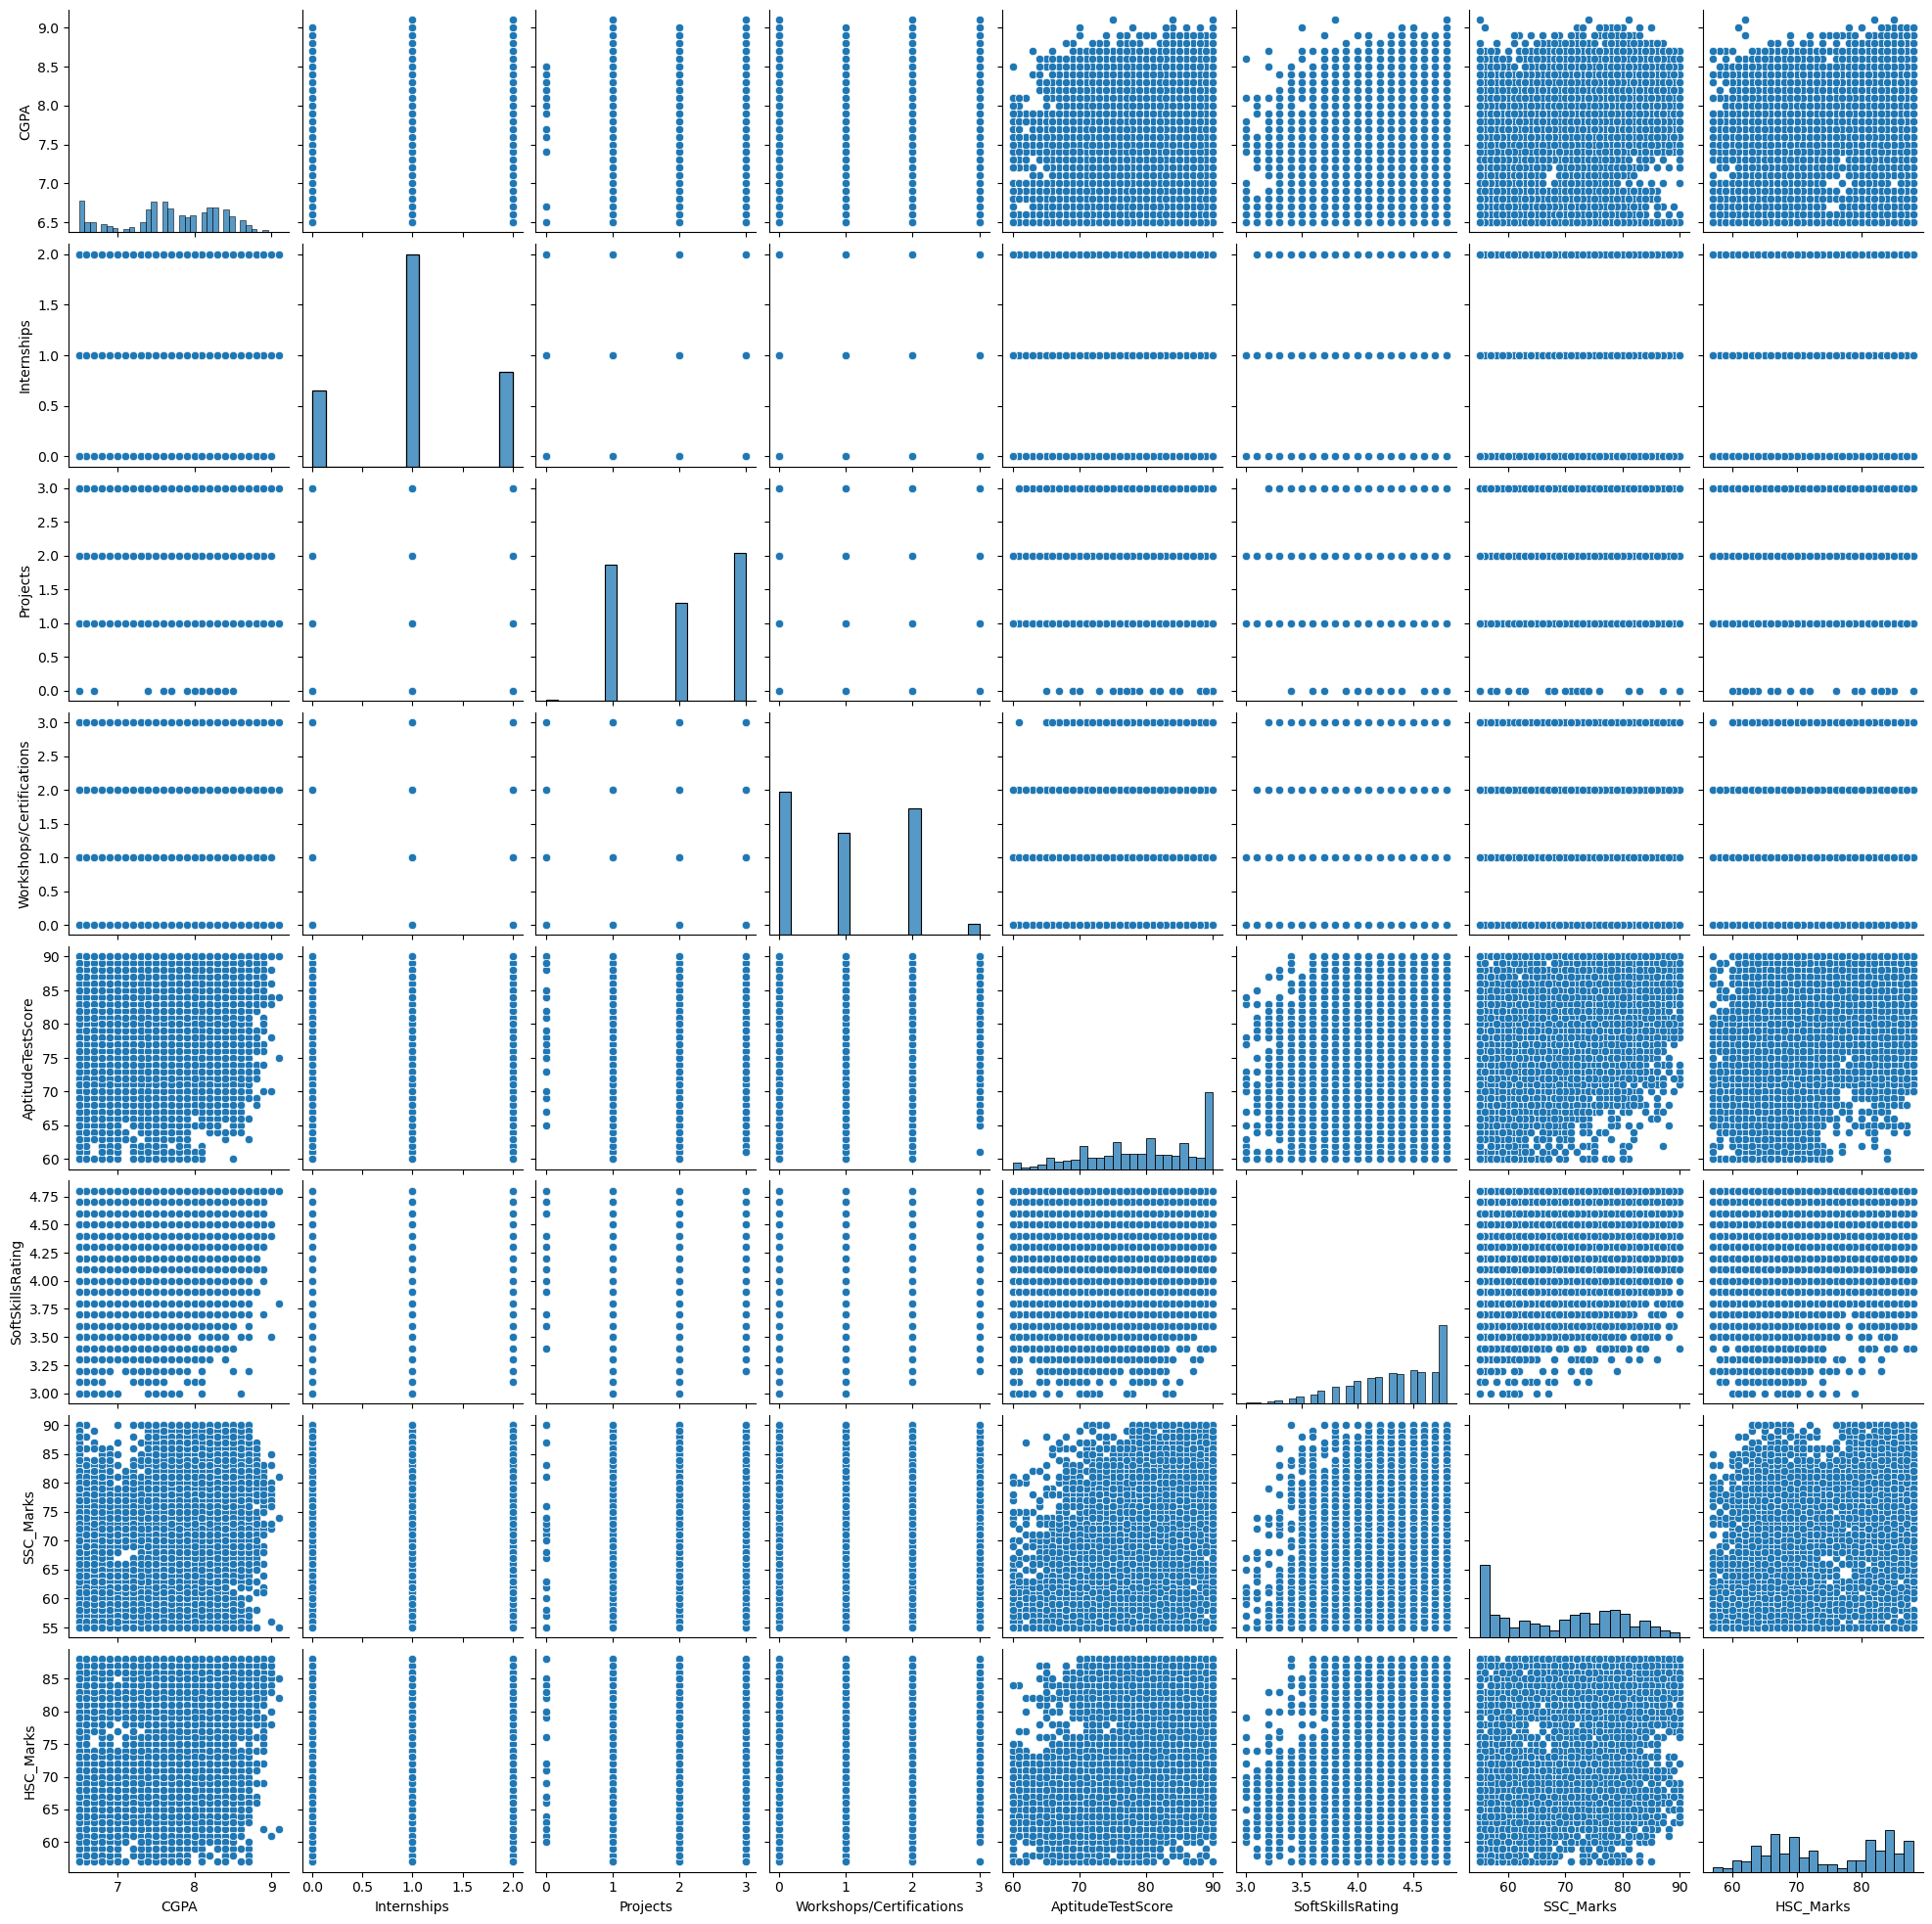

In [17]:
sns.pairplot(data)
plt.show()

## **Missing Value Treatment**

In [18]:
data.isnull().sum().sum()

0

Hence we don't need to treat any null value as no null value in the data

## **Duplicate Values**

In [19]:
data.duplicated().sum()

72

So we have 72 duplicate values we should remove them 

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data.duplicated().sum()

0

## **Outliers**

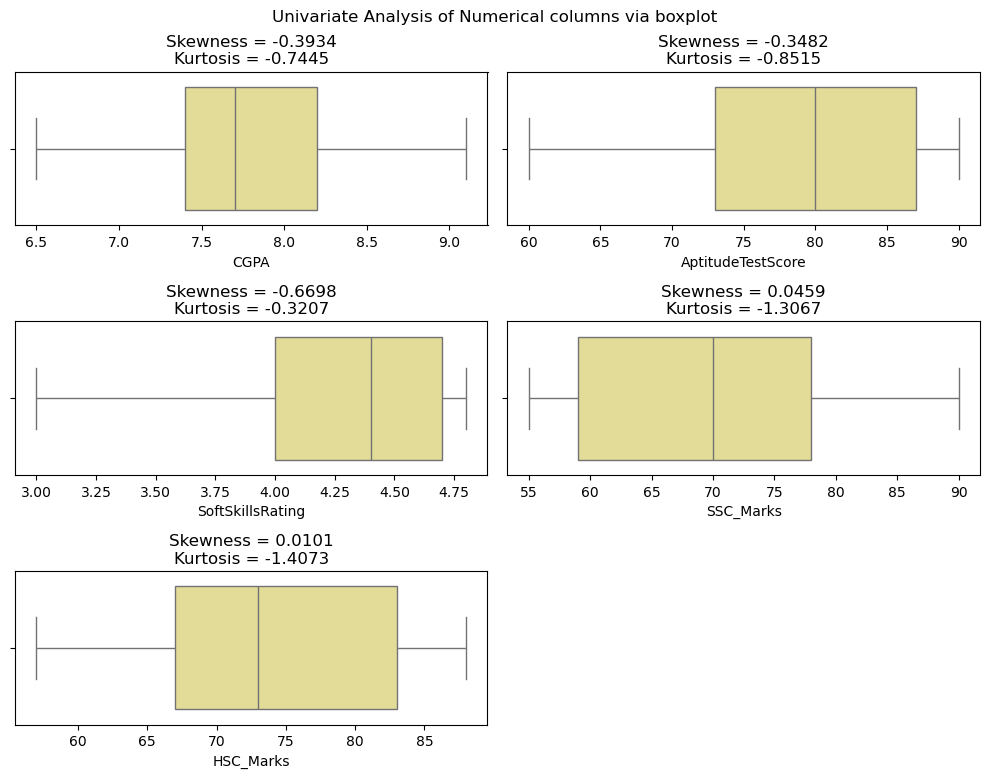

In [22]:
# Let's Visualize Outliers but we will consider whis = 3 hence it will take values into consideration upto 3 std devialtion

plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical columns via boxplot')
t = 1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data = data, x = i, fill= True, color = 'khaki', whis = 3)
    plt.title(f'''Skewness = {round(data[i].skew(), 4)}
Kurtosis = {round(data[i].kurt(), 4)}''')
    t = t + 1

plt.tight_layout()
plt.show()

Inferences :

1) No Outliers present in any of the column .

# **Feature Encoding**

In [23]:
lb = LabelEncoder()

data['PlacementStatus'] = lb.fit_transform(data['PlacementStatus'])

data['PlacementTraining'] = lb.fit_transform(data['PlacementTraining'])

data['ExtracurricularActivities'] = lb.fit_transform(data['ExtracurricularActivities'])

In [24]:
data.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,,,,,,,,,,,
1,7.5,1,1,1,65,4.4,0,0,61,79,0
2,8.9,0,3,2,90,4.0,1,1,78,82,1
3,7.3,1,2,2,82,4.8,1,0,79,80,0
4,7.5,1,1,2,85,4.4,1,1,81,80,1
5,8.3,1,2,2,86,4.5,1,1,74,88,1


## **Feature Scaling**

In [25]:
# Let's Make X-Y Split Here

X = data.drop(columns =  'PlacementStatus')
Y = data[ 'PlacementStatus']

In [26]:
sc = StandardScaler()

X = pd.DataFrame(data = sc.fit_transform(X), columns= X.columns, index= X.index)

In [27]:
X.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
StudentID,,,,,,,,,,
1,-0.303075,-0.064503,-1.176304,-0.007580,-1.766016,0.192906,-1.181420,-1.643689,-0.776106,0.513882
2,1.884668,-1.571286,1.130302,1.099146,1.305058,-0.779879,0.846439,0.608387,0.854092,0.850910
3,-0.615610,-0.064503,-0.023001,1.099146,0.322314,1.165690,0.846439,-1.643689,0.949986,0.626224
4,-0.303075,-0.064503,-1.176304,1.099146,0.690843,0.192906,0.846439,0.608387,1.141774,0.626224
5,0.947064,-0.064503,-0.023001,1.099146,0.813686,0.436102,0.846439,0.608387,0.470516,1.524966


#   **Machine Learning Models**

## **Train Test Split**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=7)

In [30]:
print(f'Size for x train is {x_train.shape}')
print(f'Size for x test is {x_test.shape}')
print(f'Size for y train is {y_train.shape}')
print(f'Size for y test is {y_test.shape}')

Size for x train is (7942, 10)
Size for x test is (1986, 10)
Size for y train is (7942,)
Size for y test is (1986,)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import recall_score,classification_report, accuracy_score, f1_score, precision_score, confusion_matrix, cohen_kappa_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [32]:
# Let's create a function for testing machine learning models

m = []
acc = []
pr = []
rec = []
kap = []
cf = []
f1 = []

def model_validation(model, xtrain, ytrain, xtest, ytest):
    mod = model
    mod.fit(xtrain, ytrain)
    soft_pred = mod.predict_proba(xtest)[:,1]
    hard_pred = mod.predict(xtest)


    print('Confusion Matrix', '\n', confusion_matrix(ytest, hard_pred) )
    print('Classification Report', '\n', classification_report(ytest, hard_pred) )


    plt.figure(figsize = (10,8))
    fpr, tpr, thre = roc_curve(ytest, soft_pred)
    plt.plot([0,1], [0,1], ls = '--', label = 'Diagonal', color = 'Purple')
    plt.plot(fpr, tpr, label = mod, color = 'hotpink')
    plt.title(f'ROC-AUC Score for {mod} is {roc_auc_score(ytest, soft_pred)}')
    plt.legend()
    plt.tight_layout()
    plt.show()




    response = input('Hey Avii !!! Do You want to save this model')
    if response.lower() == 'y':
        global scoreline
        m.append(str(model))
        acc.append(accuracy_score(ytest,hard_pred))
        pr.append(precision_score(ytest, hard_pred))
        rec.append(recall_score(ytest, hard_pred))
        f1.append(f1_score(ytest, hard_pred))
        kap.append(cohen_kappa_score(ytest, hard_pred))

        scoreline = pd.DataFrame({'MODEL' : m, 'ACCURACY' : acc, 'PRECISION' : pr, "RECALL" : rec,\
                                'F1 SCORE' : f1, 'COHEN KAPPA SCORE' : kap})

    else:
        return
    


Confusion Matrix 
 [[953 204]
 [194 635]]
Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1157
           1       0.76      0.77      0.76       829

    accuracy                           0.80      1986
   macro avg       0.79      0.79      0.79      1986
weighted avg       0.80      0.80      0.80      1986



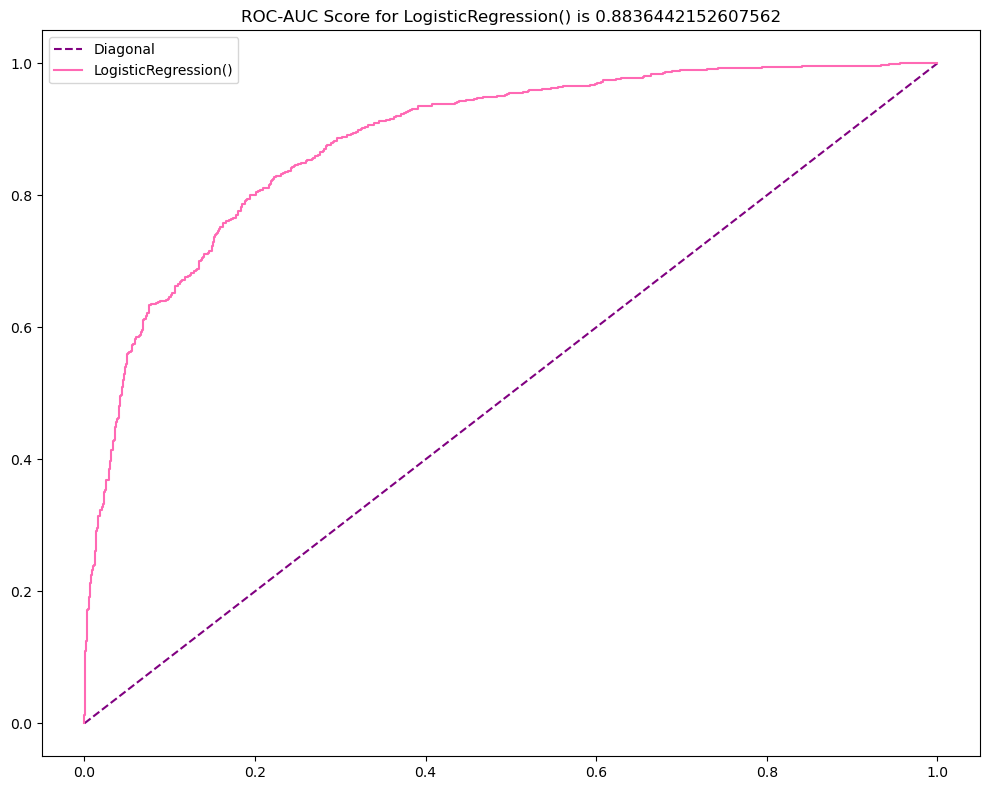

In [33]:
model_validation(LogisticRegression(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

Confusion Matrix 
 [[917 240]
 [171 658]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.79      0.82      1157
           1       0.73      0.79      0.76       829

    accuracy                           0.79      1986
   macro avg       0.79      0.79      0.79      1986
weighted avg       0.80      0.79      0.79      1986



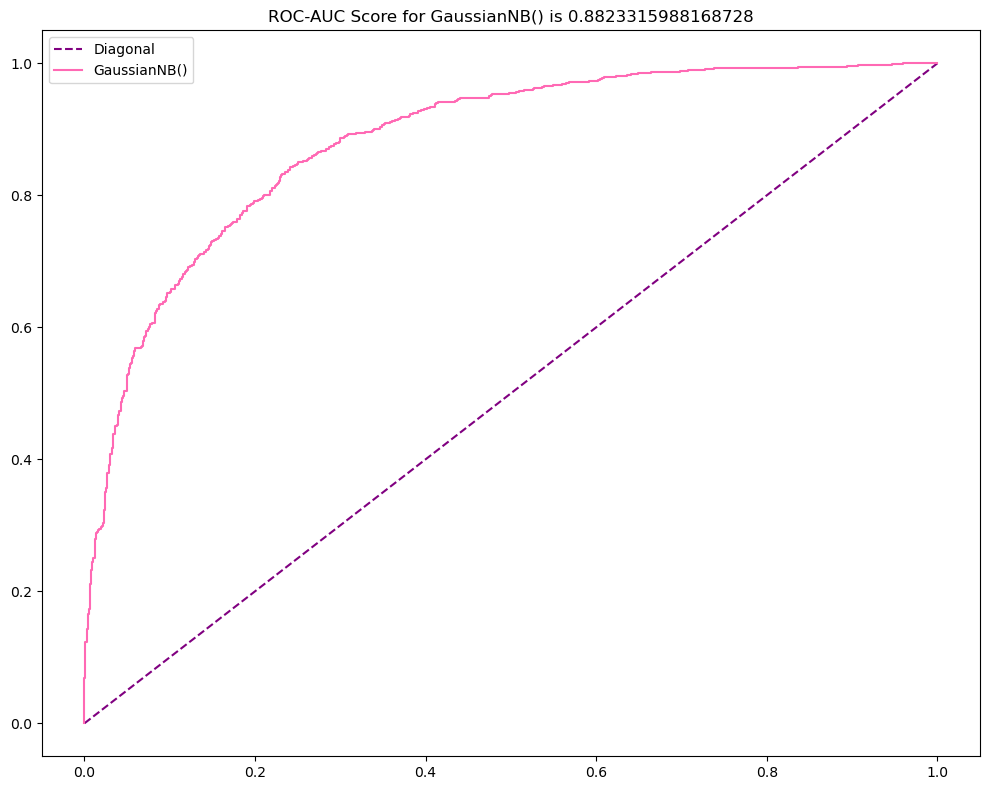

In [34]:
model_validation(GaussianNB(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

Confusion Matrix 
 [[949 208]
 [175 654]]
Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1157
           1       0.76      0.79      0.77       829

    accuracy                           0.81      1986
   macro avg       0.80      0.80      0.80      1986
weighted avg       0.81      0.81      0.81      1986



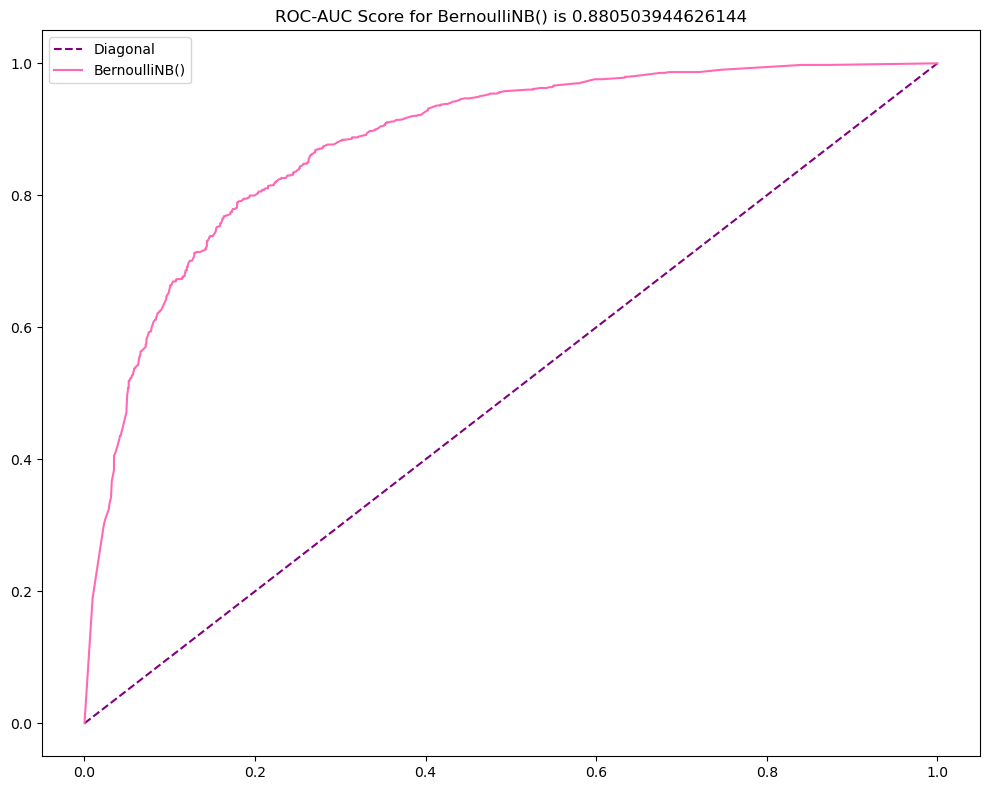

In [35]:
model_validation(BernoulliNB(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

Confusion Matrix 
 [[952 205]
 [250 579]]
Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      1157
           1       0.74      0.70      0.72       829

    accuracy                           0.77      1986
   macro avg       0.77      0.76      0.76      1986
weighted avg       0.77      0.77      0.77      1986



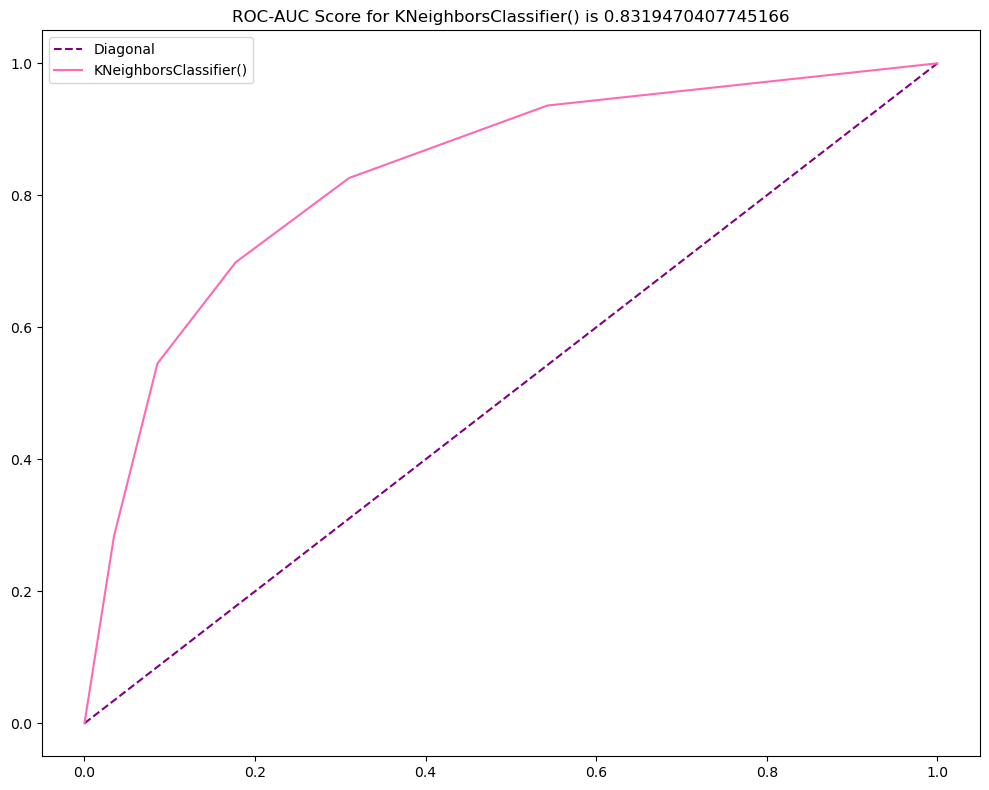

In [36]:
model_validation(KNeighborsClassifier(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

Confusion Matrix 
 [[883 274]
 [300 529]]
Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      1157
           1       0.66      0.64      0.65       829

    accuracy                           0.71      1986
   macro avg       0.70      0.70      0.70      1986
weighted avg       0.71      0.71      0.71      1986



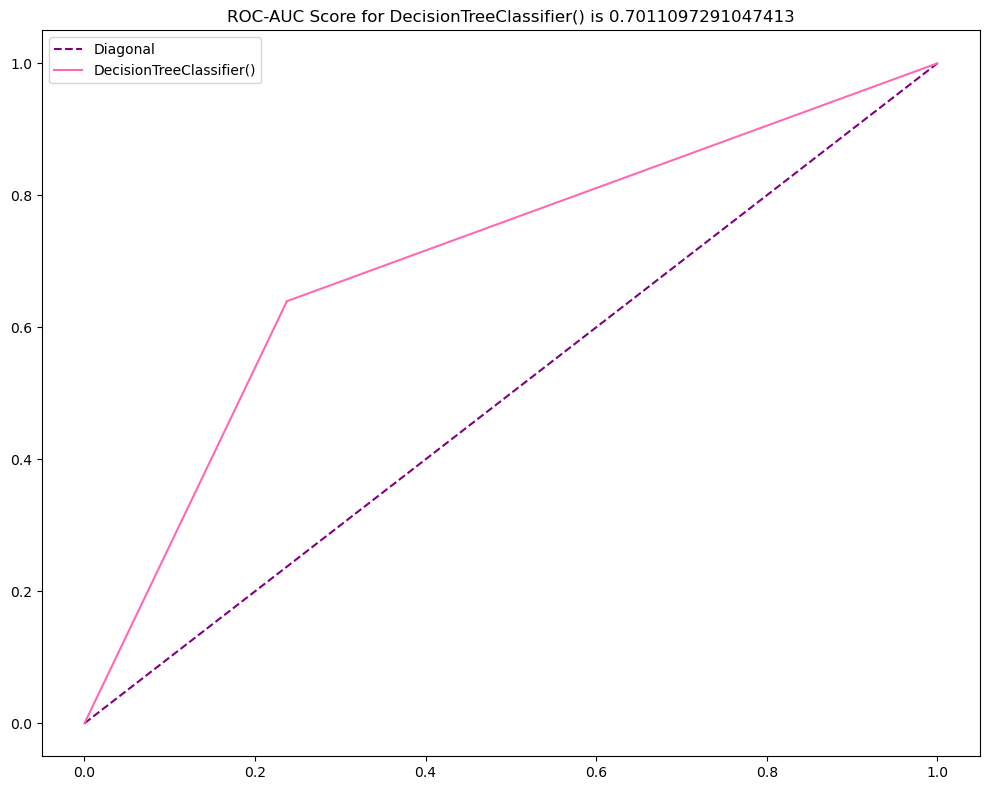

In [37]:
model_validation(DecisionTreeClassifier(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

Confusion Matrix 
 [[974 183]
 [234 595]]
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      1157
           1       0.76      0.72      0.74       829

    accuracy                           0.79      1986
   macro avg       0.79      0.78      0.78      1986
weighted avg       0.79      0.79      0.79      1986



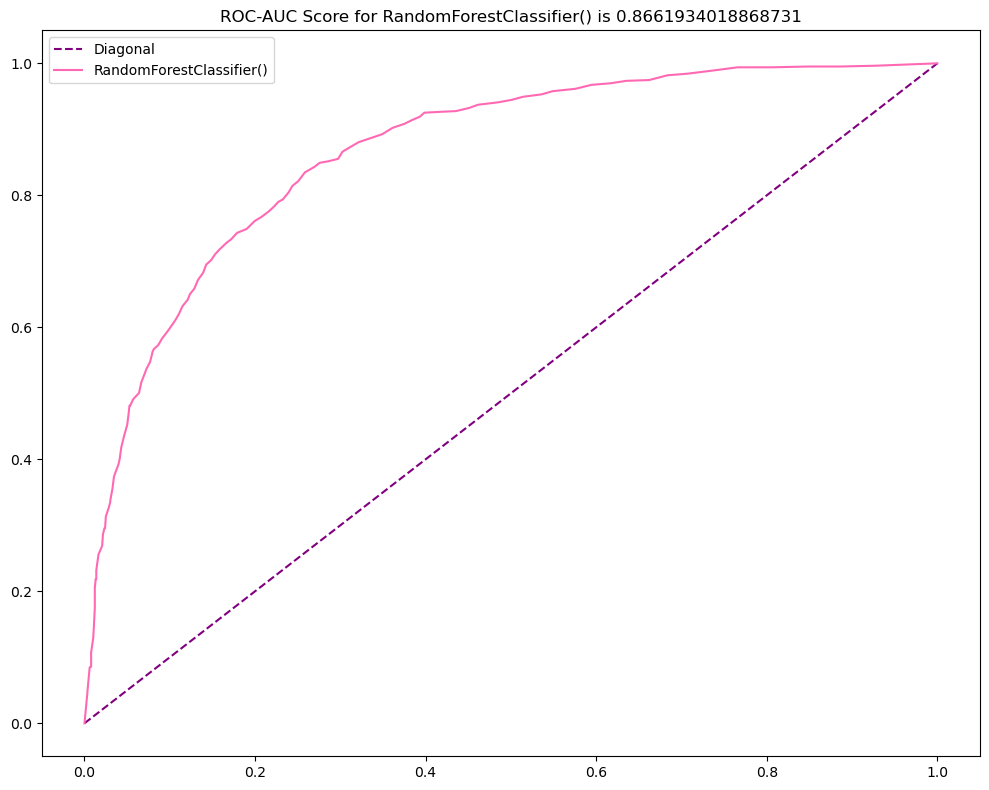

In [38]:
model_validation(RandomForestClassifier(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

Confusion Matrix 
 [[976 181]
 [218 611]]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1157
           1       0.77      0.74      0.75       829

    accuracy                           0.80      1986
   macro avg       0.79      0.79      0.79      1986
weighted avg       0.80      0.80      0.80      1986



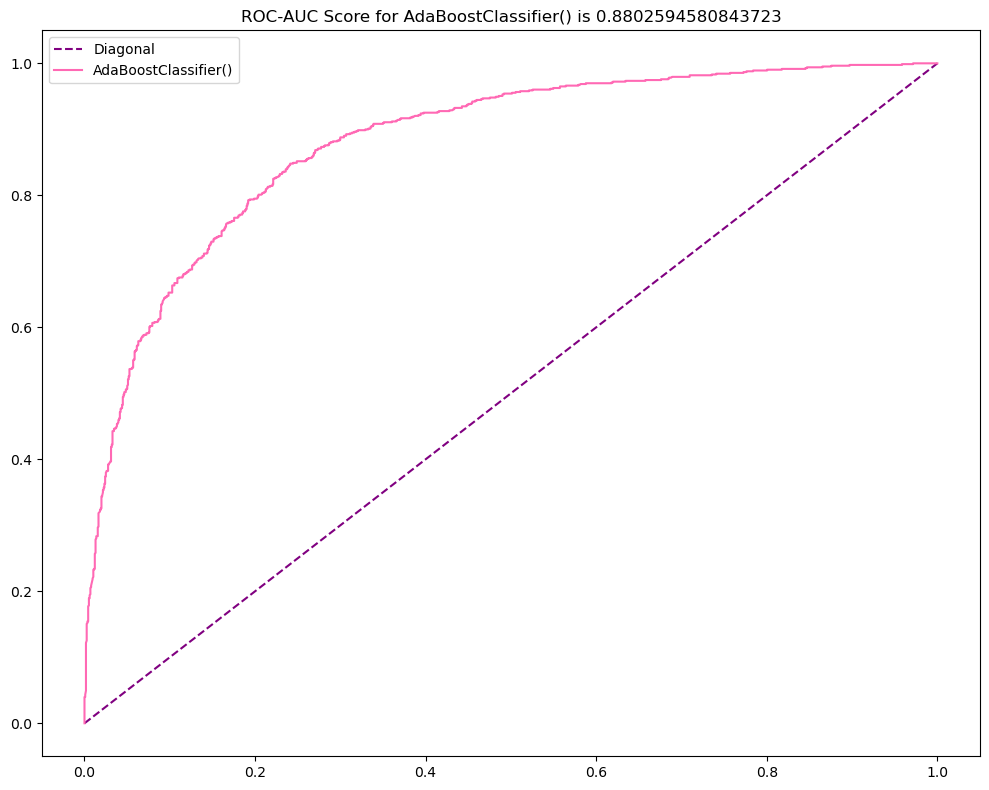

In [39]:
model_validation(AdaBoostClassifier(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

Confusion Matrix 
 [[979 178]
 [217 612]]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1157
           1       0.77      0.74      0.76       829

    accuracy                           0.80      1986
   macro avg       0.80      0.79      0.79      1986
weighted avg       0.80      0.80      0.80      1986



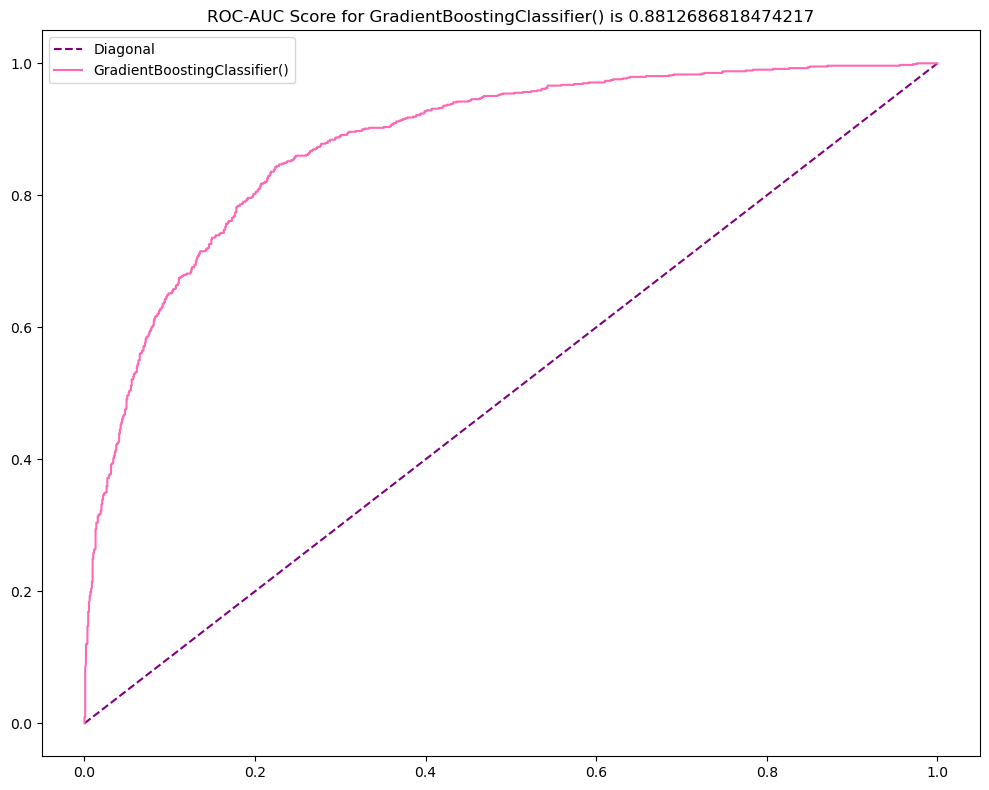

In [40]:
model_validation(GradientBoostingClassifier(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

Confusion Matrix 
 [[963 194]
 [226 603]]
Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1157
           1       0.76      0.73      0.74       829

    accuracy                           0.79      1986
   macro avg       0.78      0.78      0.78      1986
weighted avg       0.79      0.79      0.79      1986



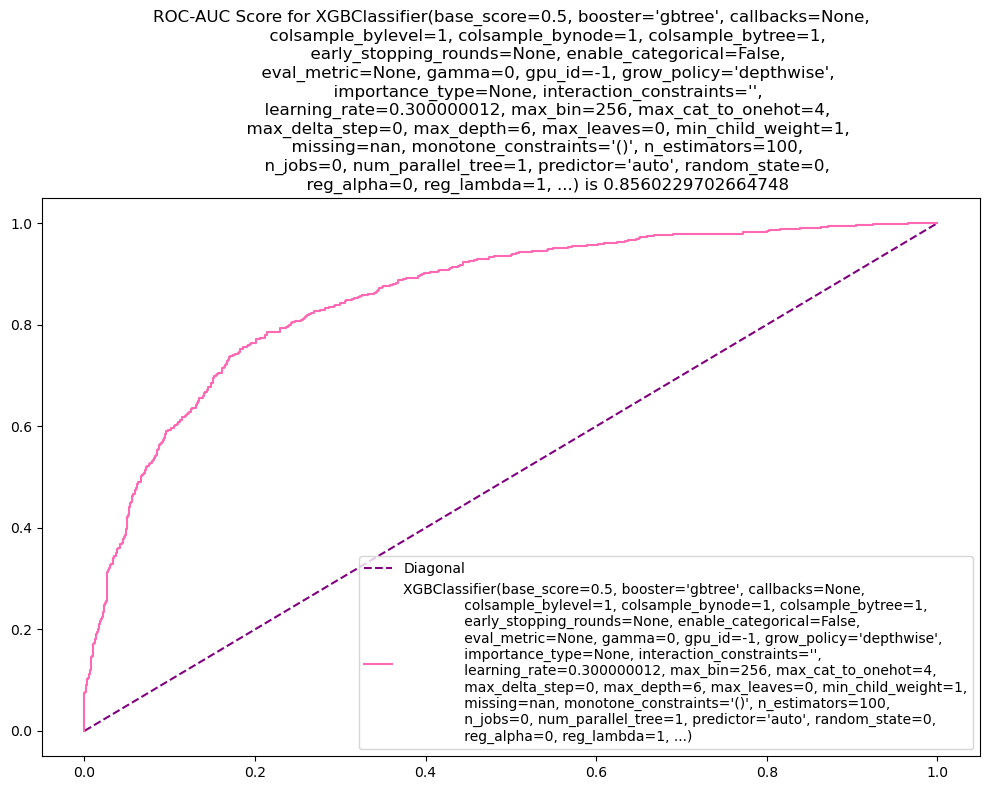

In [41]:
model_validation(XGBClassifier(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

[LightGBM] [Info] Number of positive: 3298, number of negative: 4644
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 7942, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.415261 -> initscore=-0.342260
[LightGBM] [Info] Start training from score -0.342260
Confusion Matrix 
 [[973 184]
 [213 616]]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1157
           1       0.77      0.74      0.76       829

    accuracy                           0.80      1986
   macro avg       0.80      0.79      0.79      1986
weighted avg       0.80      0.80      0.80      1986



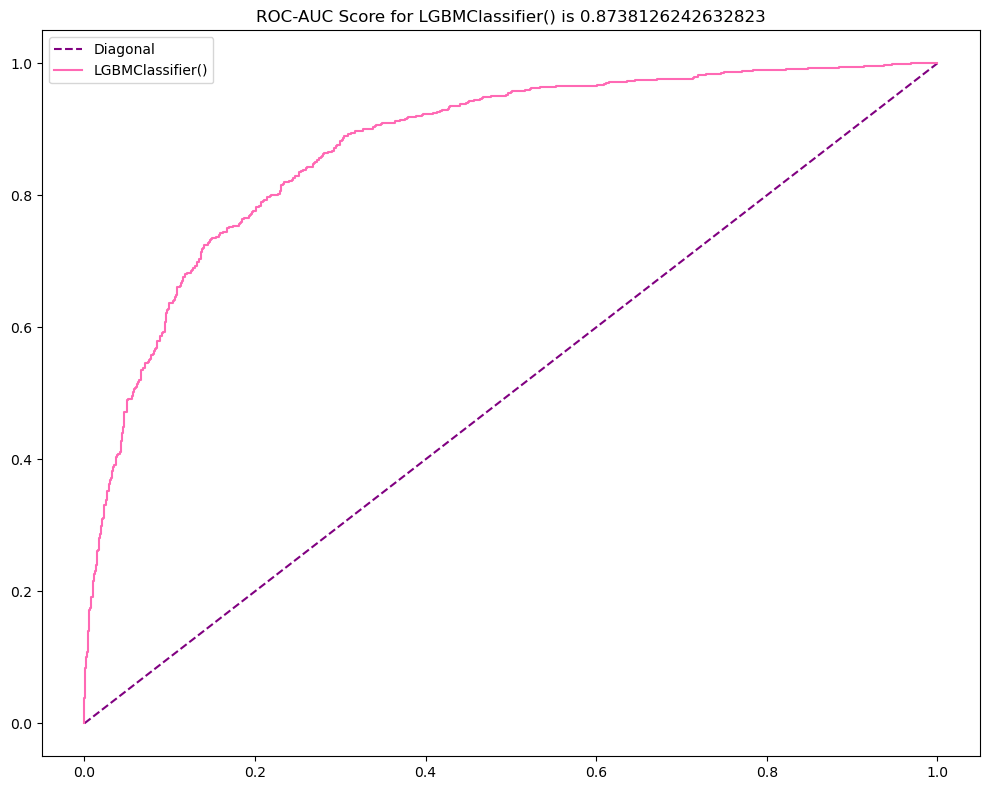

In [42]:
model_validation(LGBMClassifier(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

Learning rate set to 0.024958
0:	learn: 0.6787621	total: 143ms	remaining: 2m 23s
1:	learn: 0.6660611	total: 146ms	remaining: 1m 12s
2:	learn: 0.6540274	total: 148ms	remaining: 49.2s
3:	learn: 0.6433608	total: 150ms	remaining: 37.4s
4:	learn: 0.6323092	total: 152ms	remaining: 30.3s
5:	learn: 0.6215297	total: 155ms	remaining: 25.6s
6:	learn: 0.6109799	total: 157ms	remaining: 22.2s
7:	learn: 0.6007371	total: 159ms	remaining: 19.7s
8:	learn: 0.5921626	total: 161ms	remaining: 17.8s
9:	learn: 0.5836867	total: 164ms	remaining: 16.2s
10:	learn: 0.5768875	total: 166ms	remaining: 14.9s
11:	learn: 0.5692730	total: 168ms	remaining: 13.8s
12:	learn: 0.5618756	total: 170ms	remaining: 12.9s
13:	learn: 0.5549085	total: 173ms	remaining: 12.2s
14:	learn: 0.5485826	total: 175ms	remaining: 11.5s
15:	learn: 0.5420285	total: 177ms	remaining: 10.9s
16:	learn: 0.5363183	total: 180ms	remaining: 10.4s
17:	learn: 0.5305199	total: 182ms	remaining: 9.94s
18:	learn: 0.5250638	total: 185ms	remaining: 9.53s
19:	learn

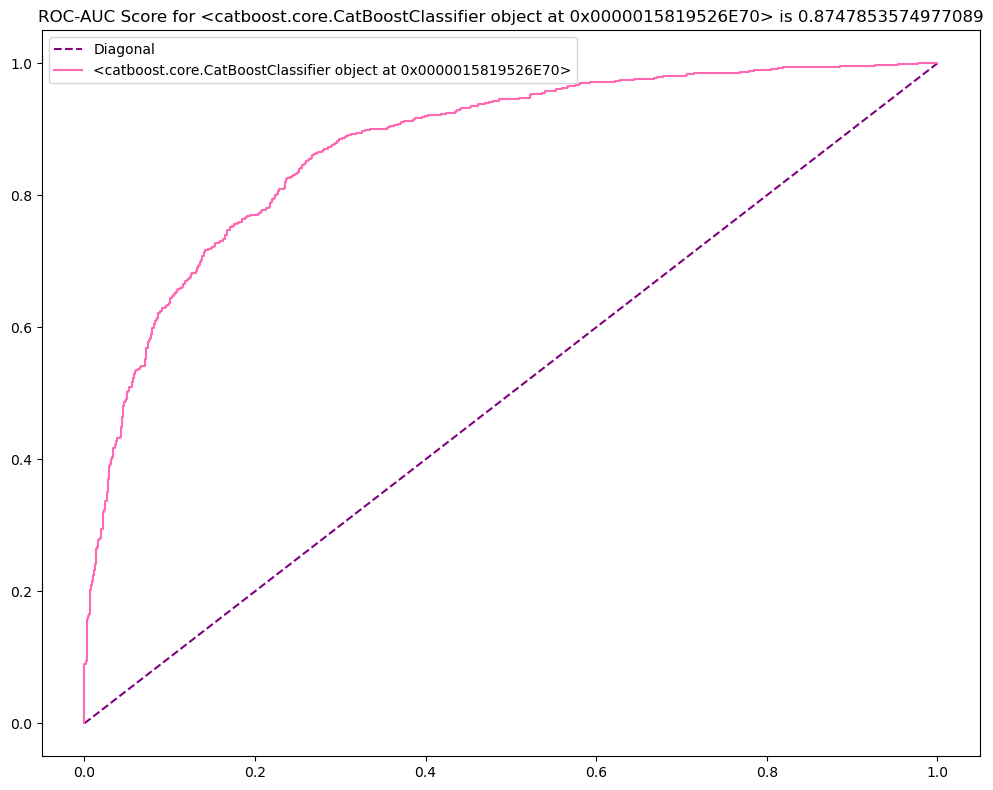

In [43]:
model_validation(CatBoostClassifier(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

Confusion Matrix 
 [[985 172]
 [287 542]]
Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      1157
           1       0.76      0.65      0.70       829

    accuracy                           0.77      1986
   macro avg       0.77      0.75      0.76      1986
weighted avg       0.77      0.77      0.77      1986



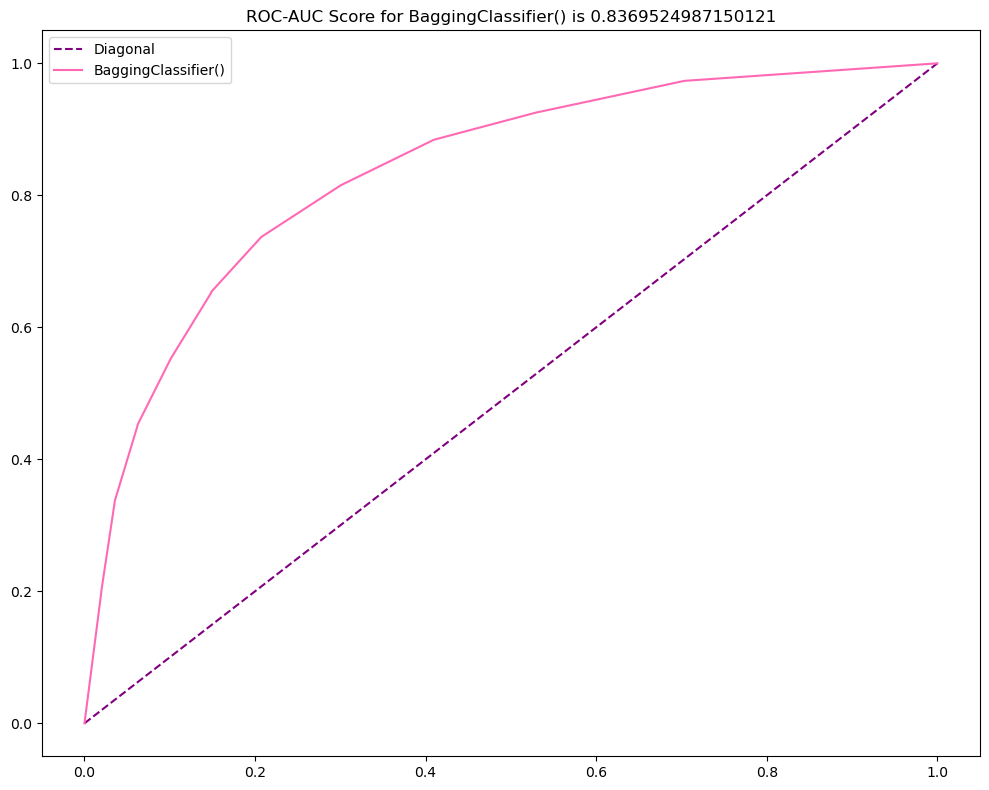

In [44]:
model_validation(BaggingClassifier(), xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)

In [45]:
scoreline

,MODEL,ACCURACY,PRECISION,RECALL,F1 SCORE,COHEN KAPPA SCORE
0,LogisticRegression(),0.799597,0.756853,0.765983,0.761391,0.588659
1,GaussianNB(),0.793051,0.732739,0.793727,0.762015,0.579458
2,KNeighborsClassifier(),0.770896,0.738520,0.698432,0.717917,0.525291
3,DecisionTreeClassifier(),0.710977,0.658780,0.638118,0.648284,0.403091
4,RandomForestClassifier(),0.790030,0.764781,0.717732,0.740510,0.564487
5,AdaBoostClassifier(),0.799094,0.771465,0.737033,0.753856,0.584290
6,GradientBoostingClassifier(),0.801108,0.774684,0.738239,0.756022,0.588316
7,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.788520,0.756587,0.727382,0.741697,0.562787
8,LGBMClassifier(),0.800101,0.770000,0.743064,0.756292,0.586942
9,<catboost.core.CatBoostClassifier object at 0x...,0.795569,0.770115,0.727382,0.748139,0.576341


## **HyperParameter Tunning**

In [46]:
from sklearn.model_selection import GridSearchCV


In [47]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100],  # Smoothing parameter
    'binarize': [None, 0.0, 0.1, 0.5, 1.0],  # Threshold for binarizing features
    'fit_prior': [True, False]  # Whether to learn class priors from data
}

scoring_metrics = {'recall': 'recall', 'f1': 'f1'}


In [48]:
gscv = GridSearchCV(estimator=BernoulliNB(), scoring= 'recall', verbose=3, param_grid=param_grid)
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END alpha=0.0001, binarize=None, fit_prior=True;, score=0.000 total time=   0.0s
[CV 2/5] END alpha=0.0001, binarize=None, fit_prior=True;, score=0.000 total time=   0.0s
[CV 3/5] END alpha=0.0001, binarize=None, fit_prior=True;, score=0.000 total time=   0.0s
[CV 4/5] END alpha=0.0001, binarize=None, fit_prior=True;, score=0.000 total time=   0.0s
[CV 5/5] END alpha=0.0001, binarize=None, fit_prior=True;, score=0.000 total time=   0.0s
[CV 1/5] END alpha=0.0001, binarize=None, fit_prior=False;, score=0.000 total time=   0.0s
[CV 2/5] END alpha=0.0001, binarize=None, fit_prior=False;, score=0.000 total time=   0.0s
[CV 3/5] END alpha=0.0001, binarize=None, fit_prior=False;, score=0.000 total time=   0.0s
[CV 4/5] END alpha=0.0001, binarize=None, fit_prior=False;, score=0.000 total time=   0.0s
[CV 5/5] END alpha=0.0001, binarize=None, fit_prior=False;, score=0.000 total time=   0.0s
[CV 1/5] END alpha=0.0001, binar

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50,
                                   100],
                         'binarize': [None, 0.0, 0.1, 0.5, 1.0],
                         'fit_prior': [True, False]},
             scoring='recall', verbose=3)

In [49]:
gscv.best_params_

{'alpha': 100, 'binarize': 0.1, 'fit_prior': False}

In [50]:
gscv.best_score_

0.790482365383731

## **Final Model Creation**

In [51]:
final_model = BernoulliNB(**gscv.best_params_)

final_model.fit(x_train, y_train)

BernoulliNB(alpha=100, binarize=0.1, fit_prior=False)

Confusion Matrix 
 [[930 227]
 [162 667]]
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      1157
           1       0.75      0.80      0.77       829

    accuracy                           0.80      1986
   macro avg       0.80      0.80      0.80      1986
weighted avg       0.81      0.80      0.80      1986



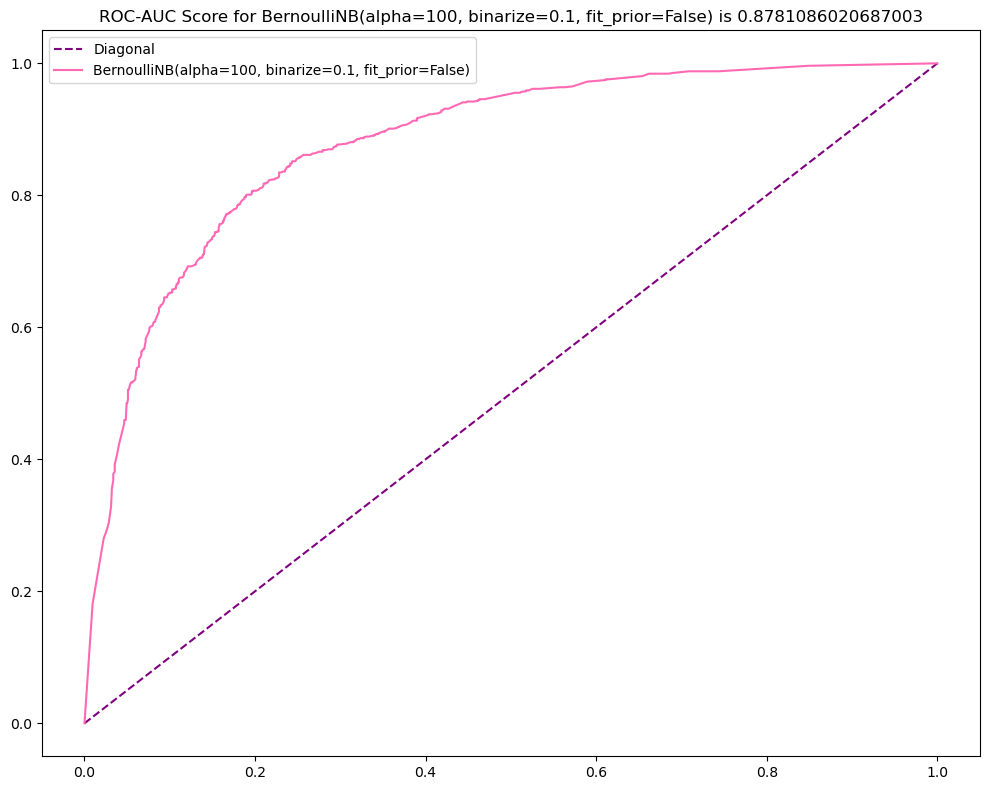

In [52]:
model_validation(final_model, x_train, y_train, x_test, y_test)

In [55]:
scoreline

,MODEL,ACCURACY,PRECISION,RECALL,F1 SCORE,COHEN KAPPA SCORE
0,LogisticRegression(),0.799597,0.756853,0.765983,0.761391,0.588659
1,GaussianNB(),0.793051,0.732739,0.793727,0.762015,0.579458
2,KNeighborsClassifier(),0.770896,0.738520,0.698432,0.717917,0.525291
3,DecisionTreeClassifier(),0.710977,0.658780,0.638118,0.648284,0.403091
4,RandomForestClassifier(),0.790030,0.764781,0.717732,0.740510,0.564487
5,AdaBoostClassifier(),0.799094,0.771465,0.737033,0.753856,0.584290
6,GradientBoostingClassifier(),0.801108,0.774684,0.738239,0.756022,0.588316
7,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.788520,0.756587,0.727382,0.741697,0.562787
8,LGBMClassifier(),0.800101,0.770000,0.743064,0.756292,0.586942
9,<catboost.core.CatBoostClassifier object at 0x...,0.795569,0.770115,0.727382,0.748139,0.576341


In [53]:
import pickle


In [54]:
with open ('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)